# Face Recognition with Olivetti Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection


### Load the Dataset

In [2]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')


print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the targer data have

In [3]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### Get 7 random people face from the dataset

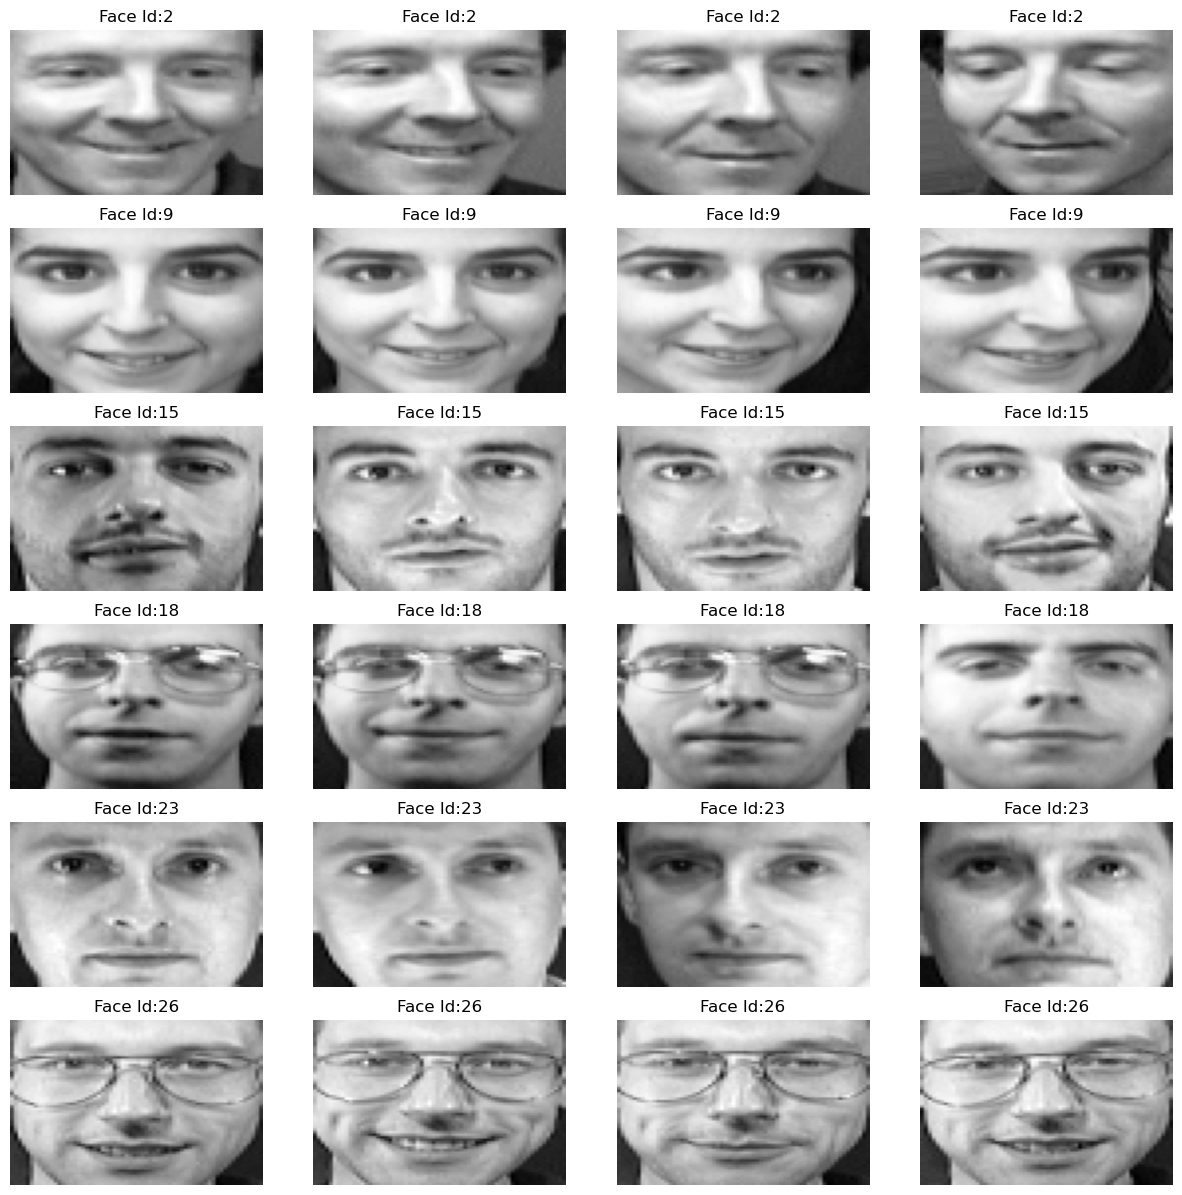

In [4]:
rows = 6
cols = 4

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = set()
while len(face_id) < rows:
    face_id.add(random.randint(0, 40))
face_id = sorted(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the dataset

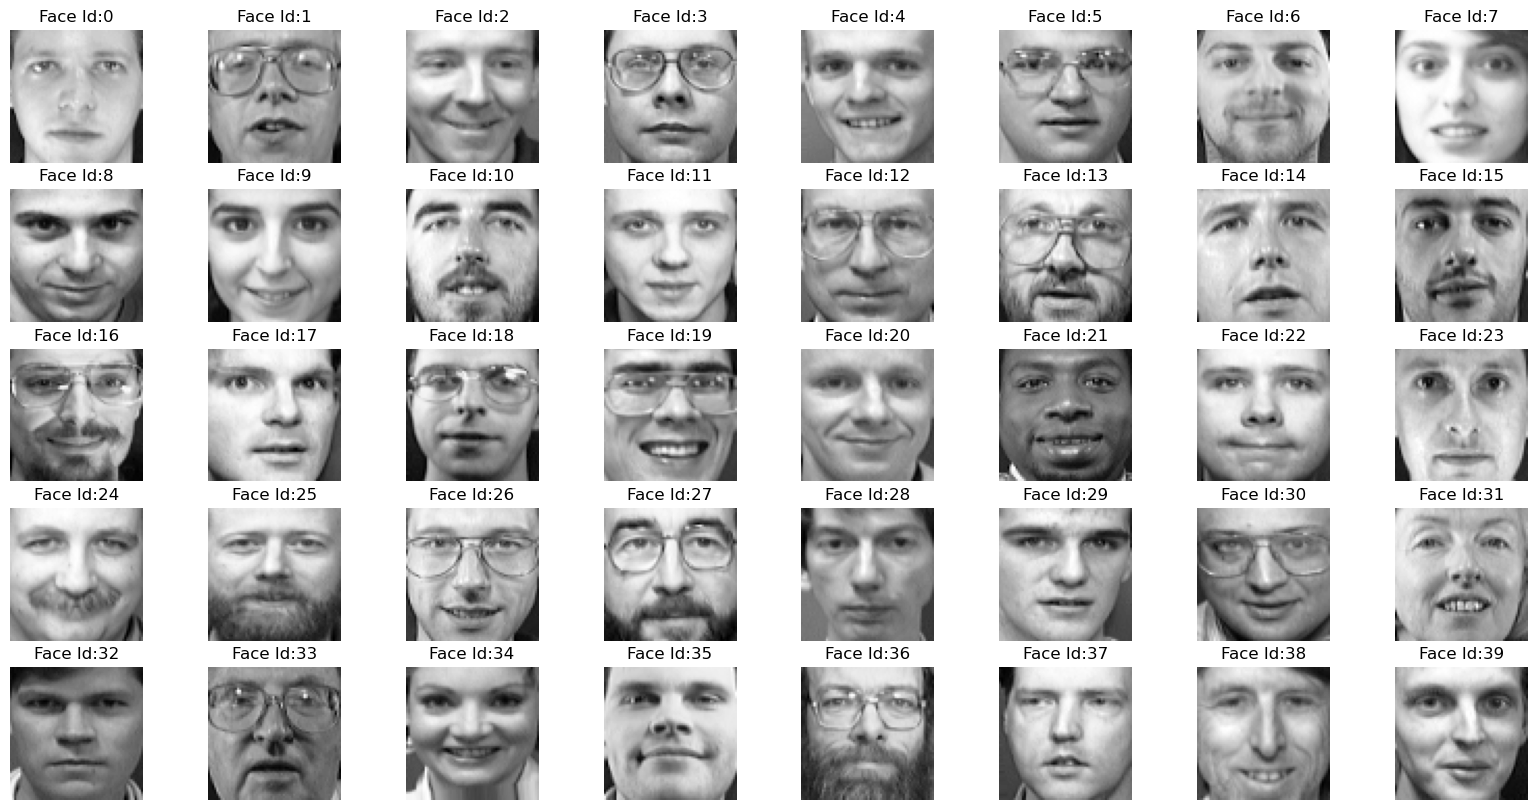

In [5]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for id in target_data:
    image_index=id * 10
    axarr[id].imshow(data[image_index], cmap='gray')
    axarr[id].set_title("Face Id:{}".format(id))
    axarr[id].axis("off")

### Distribuiton of the dataset

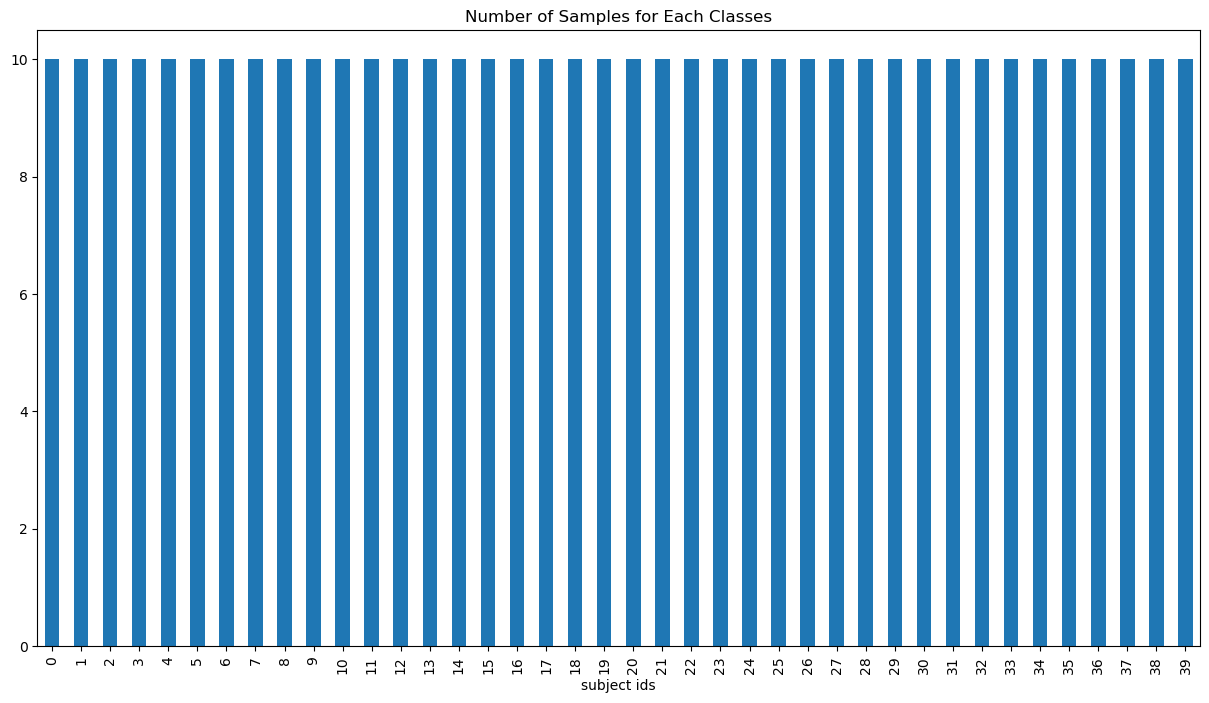

In [6]:
y_frame=pd.DataFrame()
y_frame['subject ids']= target_data
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

### Split Data into Train and Test

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)